# Flight Price Prediction
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Importing dataset

In [2]:
train_data = pd.read_excel(r"/Users/atanumondal/Desktop/study/Flight-Price-Prediction-master/archive/Data_Train.xlsx")

In [3]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_data.dropna(inplace = True)#row wise

In [6]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

---

# From description we can see that Date_of_Journey is a object data type

In [7]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day

In [8]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [9]:
train_data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5


In [10]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [11]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)

In [12]:
#train_data.head()

In [13]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)

In [14]:
train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15


In [15]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [16]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [17]:
train_data.drop(["Duration"], axis = 1, inplace = True)

---

## Handling Categorical Data

One can find many ways to handle categorical data. Some of them categorical data are,
1. Nominal data--> data are not in any order --> OneHotEncoder
2. Ordinal data --> data are in order --> LabelEncoder

In [18]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


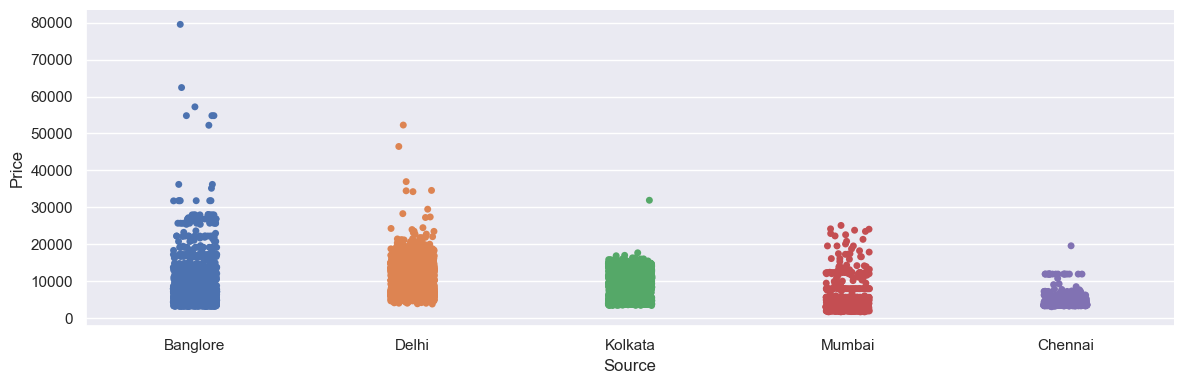

In [19]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), height = 4, aspect = 3)
plt.show()

In [20]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head(2)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0


In [21]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [22]:
#train_data["Route"]

In [23]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [24]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

#for total stops

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [25]:
train_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25


In [26]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [27]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [28]:
#data_train.head()

---

## Test set from test file

In [29]:
test_data = pd.read_excel(r"/Users/atanumondal/Desktop/study/Flight-Price-Prediction-master/archive/Test_set.xlsx")

In [30]:
#test_data.head()

In [31]:
#same processing is done for test data

In [32]:


test_data.dropna(inplace = True)
#print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)



Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

Source = pd.get_dummies(test_data["Source"], drop_first= True)

Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)
#print()
#print("Shape of test data : ", data_test.shape)



In [33]:
data_test.head(2)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0


---

## Feature Selection

Finding out the best feature which will contribute and have good relation with target variable.
Following are some of the feature selection methods,




In [34]:
#This is train data and has price column we need to exclude it
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [35]:
#price column is excluded
X = data_train.loc[:, ['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head(2)

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0


In [36]:
#this is the price column our target
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

# End of EDA ,Now we will start model building and prediction 

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
y_pred = reg_rf.predict(X_test)

In [40]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1179.691413536562
MSE: 4378724.53183368
RMSE: 2092.5402103265974


In [41]:
#metrics.accuracy_score(y_test,y_pred)
#accuracy cant be applied to continuous values

In [42]:
metrics.r2_score(y_test, y_pred)

0.7969245388285618

In [43]:
from sklearn.metrics import accuracy_score

In [44]:

round_y_test=np.round(y_pred)
round_y_test

array([16797.,  5620.,  8946., ...,  6751., 12817., 13182.])

In [45]:
accuracy_score(y_test,round_y_test,normalize=False)

30

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 6)]
max_depth.append(None)                                     #value can be cahnged ,by code=30
#criterion={"squared_error", "absolute_error", "poisson"},
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

bootstrap = [True, False]

In [48]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               #"criterion":criterion,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                "bootstrap":bootstrap}

In [49]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations  

#n_iter = 100, cv = 10 ,u can
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1,
                               error_score="raise")

In [50]:
import warnings
warnings.filterwarnings("ignore") 

In [54]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

RandomizedSearchCV(cv=5, error_score='raise', estimator=RandomForestRegressor(),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 14, 23, 32, 41, 50,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [55]:
"""{'n_estimators': 700,
 'min_samples_split': 100,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 41,
 'bootstrap': False}"""

"{'n_estimators': 700,\n 'min_samples_split': 100,\n 'min_samples_leaf': 1,\n 'max_features': 'auto',\n 'max_depth': 41,\n 'bootstrap': False}"

In [56]:
rf_random.best_params_


{'n_estimators': 700,
 'min_samples_split': 100,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 41,
 'bootstrap': False}

In [57]:
y_prediction = rf_random.predict(X_test)

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, y_prediction))
#print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

MAE: 1383.444919974227
RMSE: 2214.8385875595254


In [59]:
metrics.r2_score(y_test, y_prediction)

0.7724934071596081

In [60]:
y_test

6075     16655
3544      4959
9291      9187
5032      3858
2483     12898
         ...  
9797      7408
9871      4622
10063     7452
8802      8824
8617     14151
Name: Price, Length: 2137, dtype: int64

# LinearRegression

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
linear=LinearRegression()

In [63]:
linear.fit(X_train,y_train)

LinearRegression()

In [64]:
y_pred=linear.predict(X_test)

In [65]:
metrics.r2_score(y_test,y_pred)

0.6195943729070094

In [66]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1972.9372855148065
RMSE: 2863.9705929717834


# KNeighborsRegressor

In [67]:
from sklearn.neighbors import KNeighborsRegressor

In [68]:
clf = KNeighborsRegressor(n_neighbors = 5) 
clf.fit(X_train, y_train) 

KNeighborsRegressor()

In [69]:
y_pred=clf.predict(X_test)

In [70]:
training_score = clf.score(X_train, y_train) 

In [71]:
training_score

0.7353783201025581

In [72]:
metrics.r2_score(y_test,y_pred)

0.5743709506218349

In [73]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#print('MSE:', metrics.mean_squared_error(y_test, y_prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1879.4638277959757
RMSE: 3029.428582404846


In [74]:
"""
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_boston

# Load the Boston Housing dataset
boston = load_boston()

# Define the model
model = KNeighborsRegressor()

# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                   'weights': ['uniform', 'distance'],
                   'p': [1, 2, 5]}

# Tune the model using GridSearchCV
grid = GridSearchCV(model, hyperparameters, cv=5)
grid.fit(boston.data, boston.target)

# Print the best hyperparameters and score
print('Best hyperparameters:', grid.best_params_)
print('Best score:', grid.best_score_)
"""

"\nfrom sklearn.neighbors import KNeighborsRegressor\nfrom sklearn.model_selection import GridSearchCV\nfrom sklearn.datasets import load_boston\n\n# Load the Boston Housing dataset\nboston = load_boston()\n\n# Define the model\nmodel = KNeighborsRegressor()\n\n# Define the hyperparameters to tune\nhyperparameters = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],\n                   'weights': ['uniform', 'distance'],\n                   'p': [1, 2, 5]}\n\n# Tune the model using GridSearchCV\ngrid = GridSearchCV(model, hyperparameters, cv=5)\ngrid.fit(boston.data, boston.target)\n\n# Print the best hyperparameters and score\nprint('Best hyperparameters:', grid.best_params_)\nprint('Best score:', grid.best_score_)\n"

In [75]:
model = KNeighborsRegressor()

In [76]:
# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                   'weights': ['uniform', 'distance'],
                   'algorithm':[ 'ball_tree', 'kd_tree', 'brute'],
                   "leaf_size":[x for x in np.linspace(stop=25,start=50,num=15)],
                   'p': [1, 2, 5]}

In [77]:

rf_random = RandomizedSearchCV(estimator = clf, param_distributions = hyperparameters,
  scoring='neg_mean_squared_error', n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs =-1)

In [78]:
clf

KNeighborsRegressor()

In [79]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=30, n_jobs=-1,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [50.0, 48.214285714285715,
                                                      46.42857142857143,
                                                      44.64285714285714,
                                                      42.857142857142854,
                                                      41.07142857142857,
                                                      39.285714285714285, 37.5,
                                                      35.714285714285715,
                                                      33.92857142857143,
                                                      32.14285714285714,
                                                      30.357142857142858,
                                                      28.57142857142857,
                                                      26.785714285714285,
                                                      25.0],
                                        'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9,
                                                        10, 11, 12, 13, 14,
                                                        15],
                                        'p': [1, 2, 5],
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [80]:
"""{'weights': 'distance',
 'p': 1,
 'n_neighbors': 4,
 'leaf_size': 33.92857142857143,
 'algorithm': 'ball_tree'}"""
rf_random.best_params_

{'weights': 'distance',
 'p': 1,
 'n_neighbors': 4,
 'leaf_size': 33.92857142857143,
 'algorithm': 'ball_tree'}

In [81]:
y_pred=rf_random.predict(X_test)

In [82]:
metrics.r2_score(y_pred,y_test)
#0.5386360073668998

0.5386360073668998

In [83]:
from sklearn.model_selection import GridSearchCV

# Define the model
model = KNeighborsRegressor()


In [84]:
# Define the hyperparameters to tune
hyperparameters = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                   'weights': ['distance'],
                   'algorithm':[ 'ball_tree'],
                   "leaf_size":[x for x in np.linspace(stop=25,start=50,num=15)],
                   'p': [1, 2, 5]}

In [85]:
 # Print the best hyperparameters and score
#print('Best hyperparameters:', grid.best_params_)

In [86]:
# Tune the model using GridSearchCV
gridknei = GridSearchCV(model,param_grid=hyperparameters, cv=10,verbose=2,n_jobs=-1)

In [87]:
gridknei.fit(X_train,y_train)

Fitting 10 folds for each of 630 candidates, totalling 6300 fits
[CV] END bootstrap=True, max_depth=14, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=700; total time=   4.8s
[CV] END bootstrap=False, max_depth=32, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=800; total time=   6.5s
[CV] END bootstrap=False, max_depth=41, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1100; total time=   7.6s
[CV] END bootstrap=False, max_depth=41, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1100; total time=   8.4s
[CV] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   4.0s
[CV] END bootstrap=False, max_depth=41, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_e

GridSearchCV(cv=10, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree'],
                         'leaf_size': [50.0, 48.214285714285715,
                                       46.42857142857143, 44.64285714285714,
                                       42.857142857142854, 41.07142857142857,
                                       39.285714285714285, 37.5,
                                       35.714285714285715, 33.92857142857143,
                                       32.14285714285714, 30.357142857142858,
                                       28.57142857142857, 26.785714285714285,
                                       25.0],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15],
                         'p': [1, 2, 5], 'weights': ['distance']},
             verbose=2)

In [88]:
print("hi")

hi


In [89]:
y_pred=gridknei.predict(X_test)

In [90]:
"""{'algorithm': 'ball_tree',
 'leaf_size': 50.0,
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'"""
gridknei.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 50.0,
 'n_neighbors': 6,
 'p': 1,
 'weights': 'distance'}

In [91]:
metrics.r2_score(y_test,y_pred)

0.6429701871305866

# XGBoost AdaBoostRegressor

In [92]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
xgb_r = AdaBoostRegressor()

In [94]:
xgb_r.fit(X_train,y_train) 

AdaBoostRegressor()

In [95]:
y_pred=xgb_r.predict(X_test)

In [96]:
y_pred

array([11616.54265611, 10170.08855586, 11197.44736842, ...,
       10170.08855586, 12812.69024485, 11616.54265611])

In [97]:
metrics.r2_score(y_test,y_pred)

0.4823361038237043

In [98]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2759.1730199092663
MSE: 11161898.086338326
RMSE: 3340.942694261356


# GradientBoostingRegressor

In [99]:
grad=GradientBoostingRegressor()

In [100]:
grad.fit(X_train,y_train)

GradientBoostingRegressor()

In [101]:
y_pred=grad.predict(X_test)

In [102]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1527.3924697966968
MSE: 4618735.254844388
RMSE: 2149.1242995332746


In [103]:
metrics.r2_score(y_test,y_pred)

0.7857933777091207

In [104]:
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.model_selection import GridSearchCV



# Define the model
model = GradientBoostingRegressor()

# Define the hyperparameters to tune
hyperparameters = {'n_estimators': [100,200,500,700,1000],
                   'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
                   'max_depth': [3, 5, 7,9,12],
                   'learning_rate': [0.01, 0.1,0.2,0.3,0.4 ,0.5],
                    'criterion':['friedman_mse', 'squared_error']}

# Tune the model using GridSearchCV
#grid = GridSearchCV(model,, hyperparameters, cv=5)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations  

#n_iter = 100, cv = 10 ,u can
grid_after_cv= RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', 
                               n_iter = 30, cv = 5, verbose=2, random_state=42, n_jobs = -1)





In [105]:
grid_after_cv.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=11, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=11, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=11, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=11, p=5, weights=distance; total time=   1.1s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=12, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=12, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=12, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_neighbors=12, p=5, weights=distance; total time=   1.0s
[CV] END algorithm=ball_tree, leaf_size=32.14285714285714, n_nei

/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=14, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=14, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=14, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=15, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=15, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=15, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=15, p=2, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=15, p=5, weights=distance; total time=   0.9s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_ne

/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=2, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=2, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=2, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=3, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=3, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=3, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=3, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_ne

/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=6, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=6, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=7, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=7, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=7, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=7, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=7, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_neighbors=8, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=26.785714285714285, n_ne

/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=7, p=5, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=7, p=5, weights=distance; total time=   0.8s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=8, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=9, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=9, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=9, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=9, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=10, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=

/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/atanumondal/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 14, 23, 32, 41, 50,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [106]:
# Print the best hyperparameters and score


"""Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}"""




"Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}"

In [107]:
print('Best hyperparameters:', grid_after_cv.best_params_)

Best hyperparameters: {'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [108]:
y_pred_GBRegressor=grid_after_cv.predict(X_test)

In [109]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_GBRegressor))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_GBRegressor))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_GBRegressor)))

MAE: 1167.027659459479
MSE: 4065291.9441593145
RMSE: 2016.2569142248005


In [110]:
r2_score=metrics.r2_score(y_test,y_pred_GBRegressor)
print(r2_score)

0.8114608419975291


# doing grid serach cv

In [111]:
from sklearn.model_selection import GridSearchCV

In [112]:
# Define the hyperparameters to tune
hyperparameters = {'n_estimators': [400],
                   'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],
                   'max_depth': [3, 5, 7,9,12],
                   'learning_rate': [0.01, 0.1,0.2,0.3,0.4 ,0.5],
                    'criterion':['friedman_mse', 'squared_error']}

In [113]:
model_for_GrBRegressor=GradientBoostingRegressor()

In [114]:
grid_GridSearchCV= GridSearchCV(model_for_GrBRegressor,param_grid=hyperparameters, cv=10,verbose=2,n_jobs=-1)

In [ ]:
grid_GridSearchCV.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=11, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=12, p=5, weights=distance; total time=   0.7s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=13, p=1, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=13, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=13, p=2, weights=distance; total time=   0.1s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=13, p=5, weights=distance; total time=   1.0s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=14, p=1, weights=distance; total time=   0.2s
[CV] END algorithm=ball_tree, leaf_size=28.57142857142857, n_neighbors=14, p=1, weights=distance; total time=   0.2s

In [ ]:
grid_GridSearchCV.predict(X_train)

In [ ]:
print("hello")